# Introduction to Convolutional Neutal Networks and Computer Vision with TensorFlow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're getting to work with are from Food101 dataset (101 different classes of food).

However we've modified it to use only two classes.

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better - what does not) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


--2023-01-26 20:27:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  70.9MB/s    in 1.5s    

2023-01-26 20:27:32 (70.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data.

For a computer vision project this means visualizing lots of samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [6]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get class names programatically.

In [7]:
# Get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')

# Create a list of class_names from the subdirectories
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  # Setup the target directory (view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  # Show the shape of the image
  print(f'Image shape: {img.shape}')

  return img

['2739100.jpg']
Image shape: (512, 384, 3)


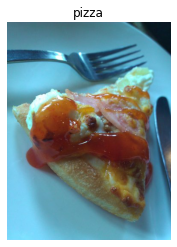

In [9]:
# View a random image for training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 76, 115, 130],
        [ 76, 115, 130],
        [ 76, 115, 130],
        ...,
        [  9,  21,  33],
        [ 11,  23,  35],
        [ 12,  24,  36]],

       [[ 76, 115, 130],
        [ 76, 115, 130],
        [ 75, 114, 129],
        ...,
        [  9,  21,  33],
        [ 10,  22,  34],
        [ 11,  23,  35]],

       [[ 73, 115, 129],
        [ 73, 115, 129],
        [ 75, 114, 129],
        ...,
        [  8,  20,  32],
        [ 10,  22,  34],
        [ 10,  22,  34]],

       ...,

       [[132, 217, 254],
        [131, 216, 253],
        [129, 217, 253],
        ...,
        [126, 228, 251],
        [126, 228, 250],
        [127, 229, 251]],

       [[134, 216, 254],
        [133, 215, 253],
        [132, 216, 253],
        ...,
        [128, 230, 252],
        [128, 231, 250],
        [129, 230, 250]],

       [[136, 215, 254],
        [136, 215, 254],
        [133, 215, 253],
        ...,
        [129, 231, 25

In [11]:
# View the image shape
img.shape # returns: width, height, color channels

(512, 384, 3)

> **Note:** As we've discussed before, many machine learning models, including neural networs, prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working wiht images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

## An end-to-end example of CNN
Let's build a CNN to find patterns in our images. More specifically, we need a way to:
* load our images
* preprocess our images
* build a CNN to find patterns
* compile our CNN
* fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1 - scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as finding VGG on the CNN Explainer Website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 209ms/step - loss: 0.5491 - accuracy: 0.7227 - val_loss: 0.4421 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4209 - accuracy: 0.8173 - val_loss: 0.3369 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3724 - accuracy: 0.8387 - val_loss: 0.2986 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3639 - accuracy: 0.8507 - val_loss: 0.3251 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3244 - accuracy: 0.8667 - val_loss: 0.2852 - val_accuracy: 0.8800


In [13]:
#Found 1500 images belonging to 2 classes.
#Found 500 images belonging to 2 classes.
#Epoch 1/5
#47/47 [==============================] - 125s 3s/step - loss: 0.5632 - accuracy: 0.6967 - val_loss: 0.3962 - val_accuracy: 0.8140
#Epoch 2/5
#47/47 [==============================] - 121s 3s/step - loss: 0.4147 - accuracy: 0.8167 - val_loss: 0.3442 - val_accuracy: 0.8640
#Epoch 3/5
#47/47 [==============================] - 121s 3s/step - loss: 0.4011 - accuracy: 0.8320 - val_loss: 0.4124 - val_accuracy: 0.8020
#Epoch 4/5
#47/47 [==============================] - 119s 3s/step - loss: 0.3678 - accuracy: 0.8453 - val_loss: 0.3103 - val_accuracy: 0.8700
#Epoch 5/5
#47/47 [==============================] - 121s 3s/step - loss: 0.3172 - accuracy: 0.8627 - val_loss: 0.3346 - val_accuracy: 0.8360

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before
Let's replicate the model we've built in a previous section to see if it works with our image data.



In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 1.4276 - accuracy: 0.5247 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# Get a summary for model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly. Let's try to improve it.

In [17]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model (same as model_2 but stepped up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 2.4933 - accuracy: 0.6213 - val_loss: 1.0642 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.7134 - accuracy: 0.7213 - val_loss: 0.7562 - val_accuracy: 0.6420
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.5743 - accuracy: 0.7587 - val_loss: 1.1829 - val_accuracy: 0.6180
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.7109 - accuracy: 0.7307 - val_loss: 0.7155 - val_accuracy: 0.6600
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4638 - accuracy: 0.8047 - val_loss: 0.5737 - val_accuracy: 0.7600


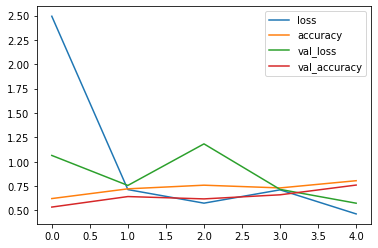

In [18]:
import pandas as pd
pd.DataFrame(history_3.history).plot()

In [19]:
# Get a summary od model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
# No of parameters for CNN 
31100

# No of parameters for model_3
15073201

print(f'Regular network requires', round(15073201/31100, 2),'times more params')

Regular network requires 484.67 times more params


> **NOTE:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitively, you might think more is better. And it lots of cases it surely is. But in this case, the difference here is the two different styles of model we're using. We here a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable parameters, **a convolutional neural network seeks to sory out and learn the most important patterns in an image.** Even though these are less learnable parameters in our CNN, these are often more helpful in deciphering between different featuren in an image.

## Binary classification: let's break it down
1. Become one with the data (visualize, visualize, visualize)
2. Preprecessing the data (prepare it for our model, main step here was scaling/normalizing & turning data into batches)
3. Create a model (start with the baseline)
4. Fit the model
5. Evaluate the model
6. Adjust parameters and improve the model (try to beat the baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2400975.jpg']
Image shape: (512, 512, 3)
['3693710.jpg']
Image shape: (512, 512, 3)


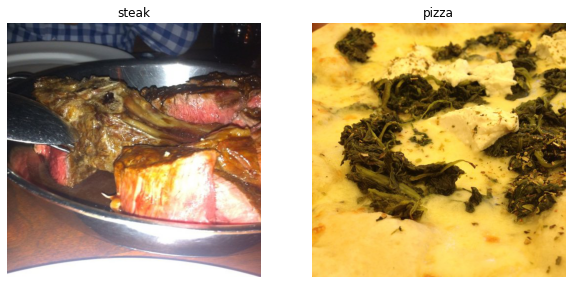

In [21]:
# Visualize data
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Next step is to turn data into **batches**.<br><br>
A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time. <br>
It does this for a couple of reasons:
1. 10000 images might not fit into the memory of processor (or GPU/TPU)
2. Trying to learn patterns in 10000 images in one hit could result in the model not being able to learn very well at all.

Why 32?

Because 32 is good for your health... according to Yann LeCun.

In [23]:
# Checking the GPU model
!nvidia-smi

Thu Jan 26 20:30:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    28W /  70W |   2420MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directiories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size for images (height, width)
                                               class_mode='binary', # Type of data we're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of training data batch
images, labels = train_data.next() # Get the next batch of images/labels in test data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)
A baseline is relatively simple model or existing resulr that you setup when beginning a machine learning experiment. As you keep experimenting, try to beat the baseline you've created.

> **NOTE:** In deep learning, there is almost infinite amount of architectures you could create. So one of the best ways to get started is to start with something relatively simple and see if it works on your data and then introduce complexity as required. For example look at which model is performing best in the field for your problem.

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model (this will be our baseline)

model_4 = Sequential([
    Conv2D(filters=10, # number of sliding windows going across input data
           kernel_size=3, # the size of window sliding over out input data
           strides=1, # the size of step the sliding window takes each time
           padding='valid', # if 'same', output shape is as input's, if 'valid', output gets compressed
           activation='relu',
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (binary classification -> 1 neuron only)
])

In [33]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [34]:
# Get a summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [35]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 0.8625 - accuracy: 0.7027 - val_loss: 0.4536 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4515 - accuracy: 0.8013 - val_loss: 0.3927 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3441 - accuracy: 0.8567 - val_loss: 0.3757 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2081 - accuracy: 0.9287 - val_loss: 0.4146 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.0722 - accuracy: 0.9820 - val_loss: 0.6175 - val_accuracy: 0.7700


### 5. Evaluate the model
Looks like our model is learning something. Let's evaluate it.

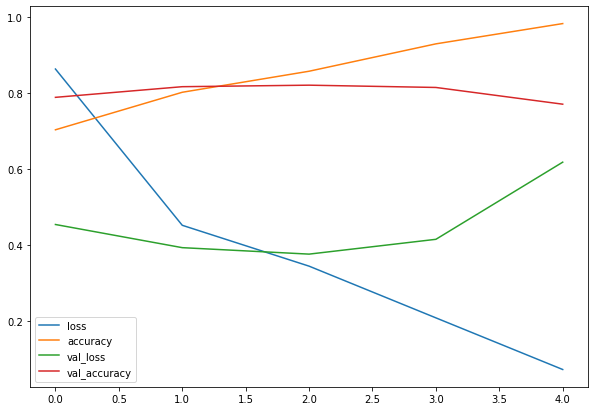

In [37]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [14]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()

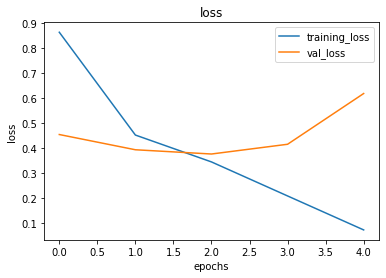

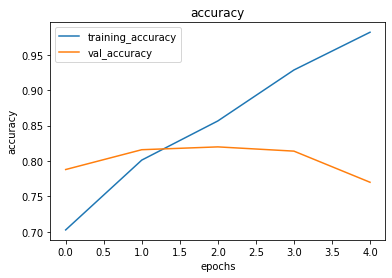

In [39]:
# Check out loss and accuracy of model_4
plot_loss_curves(history_4)

> **NOTE:** When a model's **validation loss** starts to increase, it's likely that model is **overfitting** the training dataset. This means it's learning patterns in the training data set *too well* and thus the model's ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* increase the number of conv layers
* increase the number of conv filters
* add another dense layer to the output of our flattened layer

Reduce overfitting:
* add data augmentation
* add regularization layers (such as MaxPool2D)
* add more data

> **NOTE:** Reducing overfitting is also known as *regularization.*

In [40]:
# Create the model (this is going to be new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [41]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 0.5968 - accuracy: 0.6753 - val_loss: 0.4957 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4853 - accuracy: 0.7780 - val_loss: 0.4060 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4554 - accuracy: 0.7960 - val_loss: 0.3806 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4471 - accuracy: 0.8073 - val_loss: 0.3683 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4042 - accuracy: 0.8220 - val_loss: 0.3873 - val_accuracy: 0.8240


In [43]:
# Summmary of model with max pooling layers
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

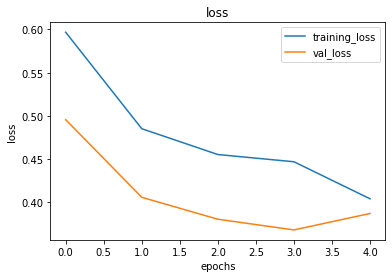

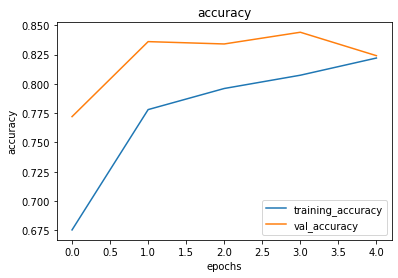

In [44]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.1, # how much do you want to rotate an image?
                                             shear_range=0.3, # how much do you want to shear an image?
                                             zoom_range=0.3, # zoom in randomly on an image
                                             width_shift_range=0.2, # move the image around on X-axis
                                             height_shift_range=0.2, # move the image around on Y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test set
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

It is the process of altering our training data, leading it to have more diversity and in return allowing our models to learn more generalizabele (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping or something similar.

Let's write some code to visualize data augmentation.

In [46]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstraton purpose only

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print('Non-augmented test data')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> **NOTE:** Data augmentation is usually only perfomed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our iamges are left as they are in the directiories but are modified as they're being loaded in the model.

Finally, let's visualize some augmented data.

In [47]:
# Get sample augmented data batches

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

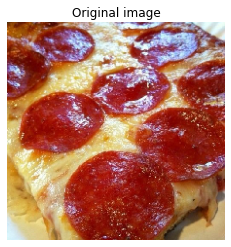

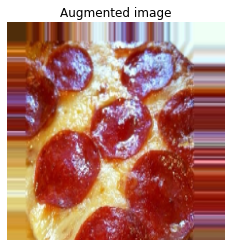

In [48]:
# Show the original image and the augmented image
import random

random_number = random.randint(0, 32) # because batch sizes are 32
print('Showing image number: {}'.format(random_number))
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [49]:
# Create the model (to be trained on augmented data)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 464ms/step - loss: 0.7090 - accuracy: 0.4247 - val_loss: 0.6894 - val_accuracy: 0.6060
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6912 - accuracy: 0.5300 - val_loss: 0.6737 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6825 - accuracy: 0.6013 - val_loss: 0.7413 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6807 - accuracy: 0.5853 - val_loss: 0.6144 - val_accuracy: 0.6820
Epoch 5/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6611 - accuracy: 0.6347 - val_loss: 0.5672 - val_accuracy: 0.7420


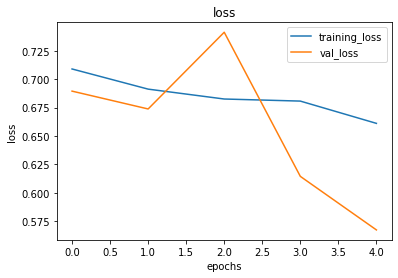

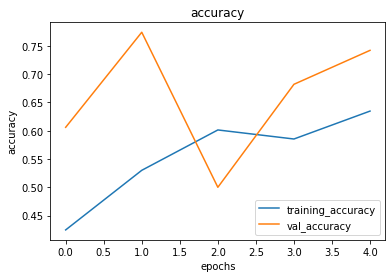

In [50]:
# Check out the loss curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (same as before) and see what happens.

In [51]:
# Import data, augment it and shuffle it
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time
                                                                    

Found 1500 images belonging to 2 classes.


In [52]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the data
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6459 - accuracy: 0.6113 - val_loss: 0.4723 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5181 - accuracy: 0.7540 - val_loss: 0.3552 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4857 - accuracy: 0.7800 - val_loss: 0.3612 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4557 - accuracy: 0.7907 - val_loss: 0.3377 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4637 - accuracy: 0.7800 - val_loss: 0.3122 - val_accuracy: 0.8680


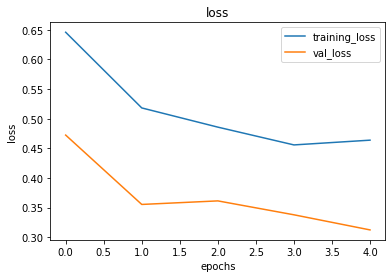

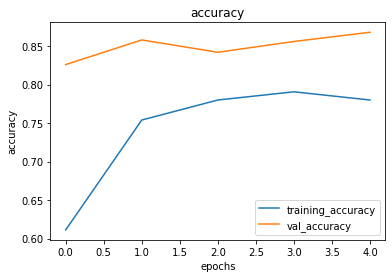

In [53]:
# Check the loss curves
plot_loss_curves(history_7)

> **NOTE:** While shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza and then steak).

### 7. Repeat until satisfied
Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or 64)
* Train for longer
* Finde an ideal learning rate
* Get more data (give more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our specific case

> **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on augmented data.

In [55]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_cnn_1 = Sequential([
    Conv2D(filters=64,
           kernel_size=3,
           strides=1,
           padding='valid',
           input_shape=(224, 224, 3),
           activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn_1.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy'])

# Fit the model
history_cnn_1 = model_cnn_1.fit(train_data_augmented_shuffled,
                                epochs=25,
                                steps_per_epoch=len(train_data_augmented_shuffled),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/25
47/47 [==============================] - 27s 554ms/step - loss: 0.6520 - accuracy: 0.6580 - val_loss: 0.4631 - val_accuracy: 0.7840
Epoch 2/25
47/47 [==============================] - 25s 523ms/step - loss: 0.5095 - accuracy: 0.7580 - val_loss: 0.4194 - val_accuracy: 0.8240
Epoch 3/25
47/47 [==============================] - 25s 525ms/step - loss: 0.5167 - accuracy: 0.7593 - val_loss: 0.3845 - val_accuracy: 0.8320
Epoch 4/25
47/47 [==============================] - 30s 644ms/step - loss: 0.5012 - accuracy: 0.7713 - val_loss: 0.3718 - val_accuracy: 0.8360
Epoch 5/25
47/47 [==============================] - 25s 526ms/step - loss: 0.4955 - accuracy: 0.7720 - val_loss: 0.3382 - val_accuracy: 0.8580
Epoch 6/25
47/47 [==============================] - 28s 592ms/step - loss: 0.4855 - accuracy: 0.7667 - val_loss: 0.4072 - val_accuracy: 0.8540
Epoch 7/25
47/47 [==============================] - 32s 677ms/step - loss: 0.4571 - accuracy: 0.7873 - val_loss: 0.3210 - val_accuracy: 0.8620

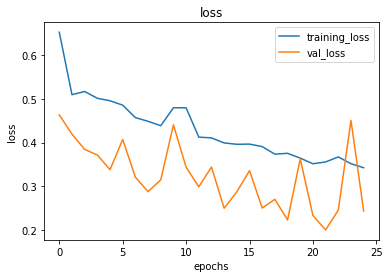

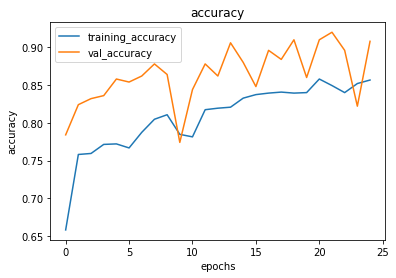

In [56]:
plot_loss_curves(history_cnn_1)

## Making a prediction with our trained model on our own custom data

In [57]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-01-26 20:53:38--  https://api.broilking.pl/api/media/c/public/fp/images/przepisy/pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia/pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia-01.jpg
Resolving api.broilking.pl (api.broilking.pl)... 51.77.50.63
Connecting to api.broilking.pl (api.broilking.pl)|51.77.50.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174486 (170K) [image/jpeg]
Saving to: ‘pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia-01.jpg’

pizza-z-grilla-prze 100%[===================>] 170.40K   502KB/s    in 0.3s    

2023-01-26 20:53:39 (502 KB/s) - ‘pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia-01.jpg’ saved [174486/174486]

--2023-01-26 20:53:39--  https://www.spendwithpennies.com/wp-content/uploads/2021/01/How-to-Cook-Juicy-Steaks-in-the-Oven-SpendWithPennies-11-500x500.jpg
Resolving www.spendwithpennies.com (www.spendwithpennies.com)... 104.22.8.75, 104.22.9.75, 172.67.11.104, ...
Connecting to www.spendwithpennies.com (ww

(-0.5, 499.5, 499.5, -0.5)

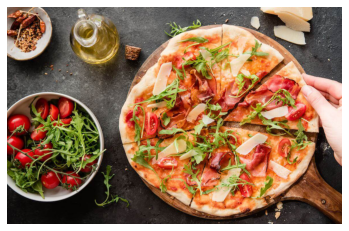

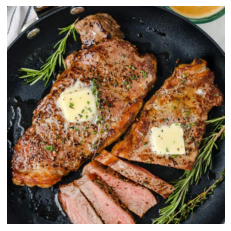

In [58]:
# View our example image
!wget https://api.broilking.pl/api/media/c/public/fp/images/przepisy/pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia/pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia-01.jpg
!wget https://www.spendwithpennies.com/wp-content/uploads/2021/01/How-to-Cook-Juicy-Steaks-in-the-Oven-SpendWithPennies-11-500x500.jpg
steak_1 = mpimg.imread('pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia-01.jpg')
steak_2 = mpimg.imread('How-to-Cook-Juicy-Steaks-in-the-Oven-SpendWithPennies-11-500x500.jpg')
plt.imshow(steak_1)
plt.axis(False)

plt.figure()
plt.imshow(steak_2)
plt.axis(False)

In [59]:
# Check the shape of our image
steak_1.shape, steak_2.shape

((757, 1170, 3), (500, 500, 3))

> **NOTE:** When you train a neural network and you want to make a prediction with it on your own, custom data it's important that your custom data (or new data) is preprocessed into the same format as data your model was trained on.

In [60]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  
  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get values between 0 and 1
  img = img/255.

  return img

In [61]:
# Load in and preprocess our image
steak_1 = load_and_prep_image('pizza-z-grilla-przepis-na-ciasto-i-sposob-pieczenia-01.jpg')
steak_2 = load_and_prep_image('How-to-Cook-Juicy-Steaks-in-the-Oven-SpendWithPennies-11-500x500.jpg')

In [62]:
# Make a prediction
pred_1 = model_cnn_1.predict(tf.expand_dims(steak_1, axis=0))

1/1 [==============================] - 0s 389ms/step


In [63]:
# Make a prediction, again
pred_2 = model_cnn_1.predict(tf.expand_dims(steak_2, axis=0))

1/1 [==============================] - 0s 15ms/step


Looks like our custom image is being put through our model, however, it currently outputs a predicted probabability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [64]:
# Remind of class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [65]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class_1 = class_names[int(tf.round(pred_1))]
pred_class_2 = class_names[int(tf.round(pred_2))]
pred_class_1, pred_class_2

('pizza', 'steak')

In [66]:
def pred_and_plot(model, url, class_names=class_names):
  """
  Imports an image located at filename, makes prediction with model
  and plots the image with thre predicted class as the title.
  """
  # Necessary imports
  import requests
  import shutil

  # Get the image filename
  filename = url.split('/')[-1]

  # Download the image 
  r = requests.get(url, stream=True)
  if r.status_code == 200:

    r.raw.decode_content = True
    with open(filename, 'wb') as f:

      shutil.copyfileobj(r.raw, f)

    print("Image downloaded successfully: ", filename)
  
  else:
    print("Image could not be downloaded.")
    return False


  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image
  plt.figure(figsize=(10,7))
  plt.imshow(img)

  # Add the probability value to the title
  if pred.mean() <= 0.5:
    plt.title(f"Prediction: {pred_class}, {(1-pred.mean())*100:.2f}%")
  else:
    plt.title(f"Prediction: {pred_class}, {pred.mean()*100:.2f}%")
  plt.axis(False)

Image downloaded successfully:  Asset_817968.jpg
1/1 [==============================] - 0s 15ms/step


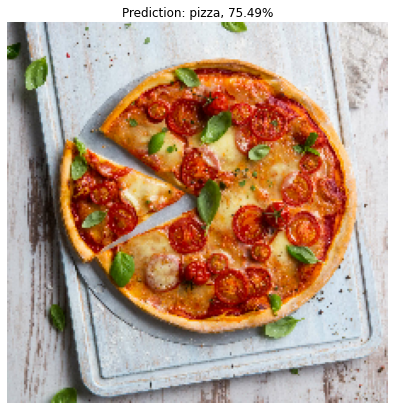

In [67]:
# Test model on a custom image
pred_and_plot(model=model_cnn_1, 
              url='https://media.kaufland.com/images/PPIM/AP_Content_2708/std.lang.all/79/68/Asset_817968.jpg')

# Multiclass image classification

We've just been through a bunch of the following steps with binary classification model, now we're going to step things up a notch with 10 classes of food - so multi-class classification.

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create a model (start with baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust the hyperparameters
7. Repeat until satisfied

### 1. Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2023-01-27 18:54:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.96.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.7MB/s    in 19s     

2023-01-27 18:54:47 (25.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk throught 10 classes of image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 10 directories and 0 imag

In [3]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [4]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3583308.jpg']
Image shape: (512, 512, 3)


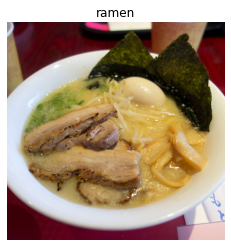

In [7]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (and prepare it for the model)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)
We've been talking a lot about a CNN Explainer website... How about we just take their model (also working on 10 classes) and use it on our problem.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [19]:
# Create our model (similar to previous ones, but the same as CNN Explainer webpage)
model_8 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [20]:
# Fitting the model
history_8 = model_8.fit(train_data, # now 10 different classes
            epochs=5, # 10 time through whole data
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 53s 223ms/step - loss: 2.2218 - accuracy: 0.1839 - val_loss: 2.1585 - val_accuracy: 0.2332
Epoch 2/5
235/235 [==============================] - 54s 230ms/step - loss: 1.9871 - accuracy: 0.2932 - val_loss: 1.9542 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.8184 - accuracy: 0.3701 - val_loss: 1.8674 - val_accuracy: 0.3456
Epoch 4/5
235/235 [==============================] - 52s 222ms/step - loss: 1.5683 - accuracy: 0.4647 - val_loss: 1.9113 - val_accuracy: 0.3452
Epoch 5/5
235/235 [==============================] - 53s 224ms/step - loss: 1.1168 - accuracy: 0.6371 - val_loss: 2.1973 - val_accuracy: 0.3180


### 5. Evaluate the model

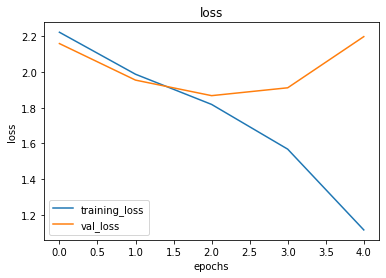

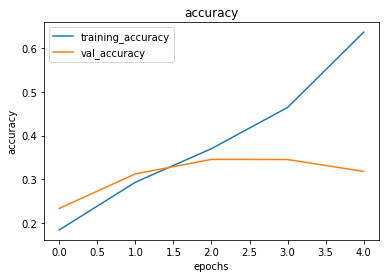

In [21]:
plot_loss_curves(history_8)

In [22]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 2.1973 - accuracy: 0.3180


[2.197310447692871, 0.3179999887943268]

What do these loss curves tell us?

Seems our model is overfitting the training set quite badly. It's getting great results on the training data but fails to generalize well on unseen data and performs poorly on it.

### 6. Adjust the hyperparameters (to beat baseline/reduce the overfitting)

Due to its performance on the training data, it's clear that model is learning something. However it's generalizing not that well as we'd like to.

So let's try and fix the overfitting with:
* **Get more data** 
* **Simplify the model** - if a current model is overfitting, it may be too complicated of a model, one way to simplify is to reduce the number of layers or reduce number of hidden units
* **Use data augmentation** - it manipulates training data to add more diversity to it without altering the original data
* **Use transfer learning** - leverages the patterns another model has learned on similar data to your own and allows you to use those pattterns on your dataset

In [27]:
# How about we simplify our model first?
# Let's try to remove 2 Conv2D layers

model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [29]:
# Fit the model with 2 conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 176ms/step - loss: 2.0700 - accuracy: 0.2613 - val_loss: 1.9268 - val_accuracy: 0.3096
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.7137 - accuracy: 0.4273 - val_loss: 1.8922 - val_accuracy: 0.3304
Epoch 3/5
235/235 [==============================] - 41s 177ms/step - loss: 1.3103 - accuracy: 0.5753 - val_loss: 1.9528 - val_accuracy: 0.3380
Epoch 4/5
235/235 [==============================] - 41s 177ms/step - loss: 0.8523 - accuracy: 0.7404 - val_loss: 2.2812 - val_accuracy: 0.2996
Epoch 5/5
235/235 [==============================] - 41s 176ms/step - loss: 0.4591 - accuracy: 0.8715 - val_loss: 2.6936 - val_accuracy: 0.2908


In [28]:
model_9.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [24]:

model_8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

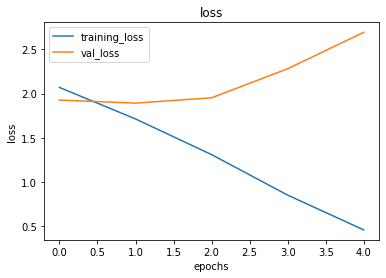

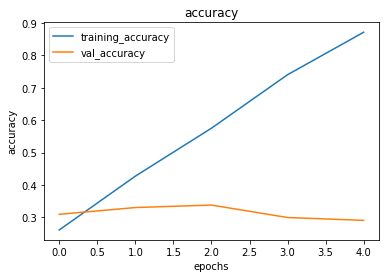

In [30]:
plot_loss_curves(history_9)

Looks like our simplifying the model experiment did not work. Accuracy went down and overfitting continued. How about we try data augmentation?

### 7. Using the data augmentation

In [32]:
# Creating ImageDataGenerator training instance with data augmentation
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.4, 
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

In [33]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       class_mode='categorical',
                                                       batch_size=32,
                                                       shuffle=True)

Found 7500 images belonging to 10 classes.


In [35]:
# Create a new model (same as the baseline to compare the results)

model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

In [36]:
# Train the model on augmented data
history_10 = model_10.fit(train_data_aug, 
                          epochs=5,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 109s 461ms/step - loss: 2.2137 - accuracy: 0.1765 - val_loss: 2.0838 - val_accuracy: 0.2268
Epoch 2/5
235/235 [==============================] - 110s 467ms/step - loss: 2.0774 - accuracy: 0.2581 - val_loss: 1.9132 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 114s 484ms/step - loss: 2.0096 - accuracy: 0.2908 - val_loss: 1.8319 - val_accuracy: 0.3632
Epoch 4/5
235/235 [==============================] - 107s 457ms/step - loss: 1.9716 - accuracy: 0.3017 - val_loss: 1.7565 - val_accuracy: 0.3996
Epoch 5/5
235/235 [==============================] - 106s 452ms/step - loss: 1.9251 - accuracy: 0.3319 - val_loss: 1.7122 - val_accuracy: 0.4052


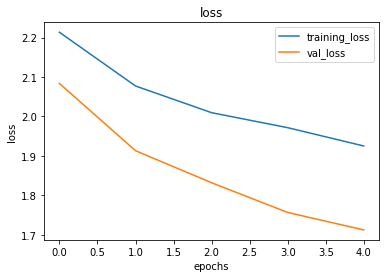

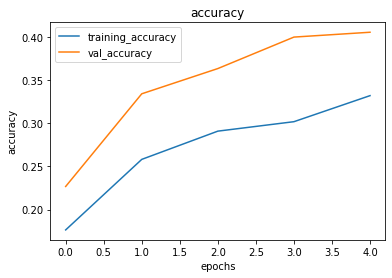

In [37]:
plot_loss_curves(history_10)

In [38]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.7122 - accuracy: 0.4052


[1.7122083902359009, 0.4052000045776367]

Woah! That looks much better, loss curves are much close to each other than baseline model and they are heading in the right direction. So if we were to train for longer, we might see another improvement!

### 7. Repeat until satisfied

We could keep going, trying to bring loss curves together and trying to improve the validation/test accuracy.

How?

* **Restructure the model's architecture**
* **Train for longer**
* **Look for ideal learning rate**
* **Different methods of data augmentation**
* **Fine tune the model**
* **Try transfer learning**

In [41]:
# Try training for longer (15 epochs)
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss='categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

history_11 = model_11.fit(train_data_aug,
             epochs=15, 
             steps_per_epoch=len(train_data_aug),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/15
235/235 [==============================] - 108s 459ms/step - loss: 2.2104 - accuracy: 0.1861 - val_loss: 2.0348 - val_accuracy: 0.2748
Epoch 2/15
235/235 [==============================] - 107s 455ms/step - loss: 2.0889 - accuracy: 0.2473 - val_loss: 1.9204 - val_accuracy: 0.3200
Epoch 3/15
235/235 [==============================] - 108s 458ms/step - loss: 2.0370 - accuracy: 0.2799 - val_loss: 1.8874 - val_accuracy: 0.3376
Epoch 4/15
235/235 [==============================] - 107s 454ms/step - loss: 1.9968 - accuracy: 0.2984 - val_loss: 1.8325 - val_accuracy: 0.3736
Epoch 5/15
235/235 [==============================] - 108s 458ms/step - loss: 1.9568 - accuracy: 0.3116 - val_loss: 1.7539 - val_accuracy: 0.4012
Epoch 6/15
235/235 [==============================] - 106s 453ms/step - loss: 1.9190 - accuracy: 0.3344 - val_loss: 1.7944 - val_accuracy: 0.3696
Epoch 7/15
235/235 [==============================] - 107s 457ms/step - loss: 1.9094 - accuracy: 0.3309 - val_loss: 1.7377 -

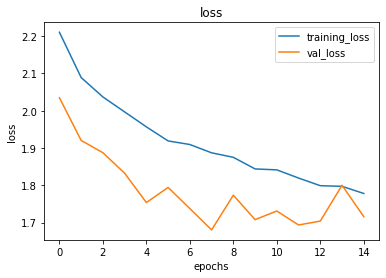

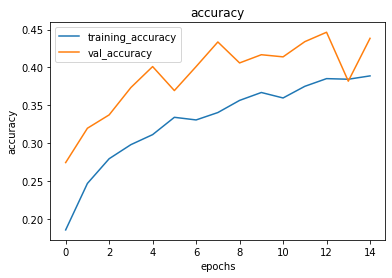

In [42]:
plot_loss_curves(history_11)

In [43]:
# Change the architecture a bit
model_12 = Sequential([
    Conv2D(128, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(256, 3, activation='relu'),
    Conv2D(256, 3, activation='relu'),
    Conv2D(256, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(512, 3, activation='relu'),
    Conv2D(512, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model_12.compile(loss='categorical_crossentropy', 
                 optimizer='Adam',
                 metrics=['accuracy'])

history_12 = model_12.fit(train_data_aug,
                          epochs=5,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 220s 880ms/step - loss: 2.3190 - accuracy: 0.0872 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 205s 873ms/step - loss: 2.3028 - accuracy: 0.0951 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 206s 877ms/step - loss: 2.3028 - accuracy: 0.0947 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 207s 878ms/step - loss: 2.3028 - accuracy: 0.0936 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 207s 877ms/step - loss: 2.3028 - accuracy: 0.0933 - val_loss: 2.3026 - val_accuracy: 0.1000


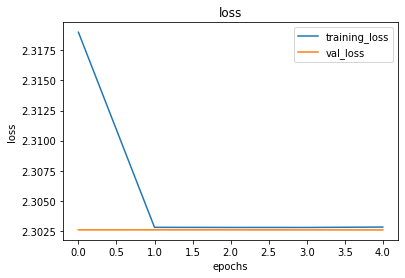

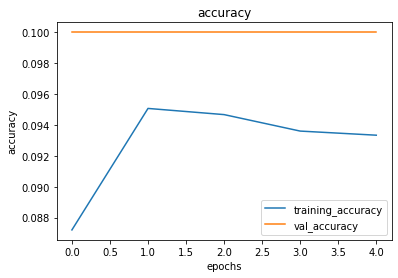

In [44]:
plot_loss_curves(history_12)